In [65]:
from simulations.elastic_collisions import Body, HiddenVariables, Variables, ElasticCollisionSimulation
import torch
from torch import Tensor
from torch.distributions import Distribution
from typing import Union, Callable

### The n-body collision problem

##### Visualise n body collision scenes for different bodies

#### Scenario 1 - Assumptions: 
- No force field (i.e. no air drag, attraction forces between bodies etc.)
- bodies are points of mass (a 'radius' value sets a range in which two close points are assumed to have collided)
- collisions are elastic (no loss of energy)
- the 'radius' values are the same and constant for each body
- the masses are the same and constant for each body 
- collisions with borders are also elastic
- the initial positions are fixed 

**Hidden variables:** initial velocity vectors

In [66]:

total_time = 10.0 
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius
velocity_distribution = torch.distributions.Uniform(low=-4, high=4)
position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)

num_bodies = 4
VARIABLES = Variables(
    masses = torch.full((num_bodies,), constant_mass_value),
    radii = torch.full((num_bodies,), constant_radius_value),
    starting_positions = None,
    initial_velocities= None,
    acceleration_coefficients = torch.full((num_bodies,), acceleration_coefficient_value),
    num_bodies = num_bodies,
    space_size = torch.tensor([space_size, space_size]),
)

initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(VARIABLES, position_distribution)
VARIABLES.starting_positions = initial_positions
print(f"initial_positions: {initial_positions}")

initial_velocities = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))
print(f"initial_velocities: {initial_velocities}")


simulation = ElasticCollisionSimulation( variables=VARIABLES, 
                                         enable_logging=False, 
                                         noise=False)

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)

result = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                             total_time=total_time, \
                             dt=dt)

position_history = simulation.get_position_history()
velocity_history = simulation.get_velocity_history()

print(f"position_history: {position_history}")

# assume that position history is of length num_bodies 
assert len(position_history) == num_bodies
assert len(velocity_history) == num_bodies

# print position histories for body 1 
print(f"position_history for body 1: {position_history[0]}")
print(f"time history for body 1: {len(position_history[0])}")

# Transform the history so that each element represents a timestep
position_history_by_timestep = list(map(list, zip(*position_history)))
velocity_history_by_timestep = list(map(list, zip(*velocity_history)))

num_timesteps = len(position_history_by_timestep)

print(f"position_history_by_timestep: {position_history_by_timestep}")

# Assume that position history is of length num_timesteps
assert len(position_history_by_timestep) == num_timesteps
assert len(velocity_history_by_timestep) == num_timesteps

# Print position histories for timestep 1
print(f"position_history for timestep 1: {position_history_by_timestep[0]}")
print(f"velocity_history for timestep 1: {velocity_history_by_timestep[0]}")

print(f"position of body 1 at timestep 1: {position_history_by_timestep[0][0]}")
print(f"velocity of body 1 at timestep 1: {velocity_history_by_timestep[0][0]}")



initial_positions: tensor([[4.5985, 3.2140],
        [2.7924, 6.0017],
        [8.9474, 3.6950],
        [5.6970, 6.1823]])
initial_velocities: tensor([[-3.5204,  1.0282],
        [-3.2345, -1.2544],
        [ 0.0401,  3.7770],
        [ 1.5021, -1.8304]])


position_history: [[tensor([4.2465, 3.3168]), tensor([3.8944, 3.4197]), tensor([3.5424, 3.5225]), tensor([3.1904, 3.6253]), tensor([2.8383, 3.7281]), tensor([2.4863, 3.8310]), tensor([2.1343, 3.9338]), tensor([2.1746, 3.5498]), tensor([2.2002, 3.1842]), tensor([2.2257, 2.8187]), tensor([2.2513, 2.4531]), tensor([2.2768, 2.0875]), tensor([2.3024, 1.7219]), tensor([2.3279, 1.3563]), tensor([2.3534, 0.9907]), tensor([2.3790, 1.3563]), tensor([2.4045, 1.7219]), tensor([2.4301, 2.0875]), tensor([2.4556, 2.4531]), tensor([2.4812, 2.8187]), tensor([2.5067, 3.1842]), tensor([2.5323, 3.5498]), tensor([2.5578, 3.9154]), tensor([2.5834, 4.2810]), tensor([2.6089, 4.6466]), tensor([2.6345, 5.0122]), tensor([2.9163, 4.7642]), tensor([3.1980, 4.5164]), tensor([3.4798, 4.2685]), tensor([3.7616, 4.0206]), tensor([4.0433, 3.7727]), tensor([4.3251, 3.5248]), tensor([4.6069, 3.2769]), tensor([4.8887, 3.0290]), tensor([5.1704, 2.7811]), tensor([4.8776, 2.8891]), tensor([4.5903, 2.9936]), tensor([4.3031, 3.

In [67]:
# added collision history 

collision_history_by_timestep = simulation.get_collision_history_per_timestep()

In [68]:
# loop though collision history by timestep and print out the collision history
for timestep, collisions in collision_history_by_timestep.items():
    print(f"timestep {timestep}:")
    for collision in collisions:

        # if there is key "boundary" then use that instead of body2 
        if "boundary" in collision:
            print(f"collision at time {collision['time']}: body {collision['body1']} and boundary {collision['boundary']}")
        else:
            print(f"collision at time {collision['time']}: body {collision['body1']} and body {collision['body2']}")

timestep 0:
timestep 1:
timestep 2:
timestep 3:
timestep 4:
timestep 5:
timestep 6:
collision at time 0.6000000000000001: body 1 and boundary 0
timestep 7:
collision at time 0.7000000000000001: body 0 and body 1
timestep 8:
timestep 9:
timestep 10:
collision at time 1.0: body 1 and boundary 0
timestep 11:
timestep 12:
timestep 13:
timestep 14:
collision at time 1.4000000000000001: body 2 and boundary 0
timestep 15:
collision at time 1.5: body 0 and boundary 1
collision at time 1.5: body 2 and boundary 1
timestep 16:
timestep 17:
timestep 18:
timestep 19:
collision at time 1.9000000000000001: body 1 and boundary 1
timestep 20:
timestep 21:
timestep 22:
collision at time 2.2: body 3 and boundary 0
timestep 23:
timestep 24:
timestep 25:
timestep 26:
collision at time 2.6: body 0 and body 1
timestep 27:
timestep 28:
timestep 29:
collision at time 2.9000000000000004: body 3 and boundary 1
timestep 30:
timestep 31:
collision at time 3.1: body 1 and boundary 0
timestep 32:
timestep 33:
collis

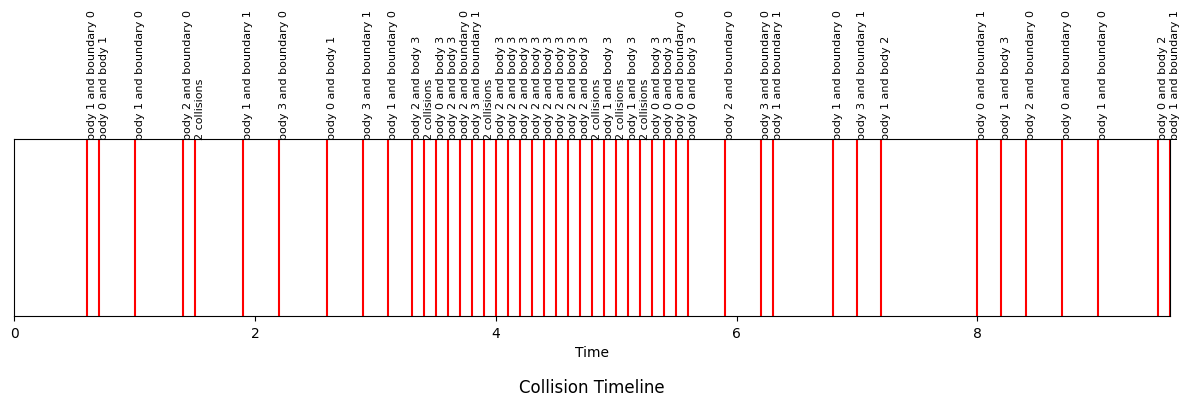

In [69]:
import matplotlib.pyplot as plt

# Get the total time span
total_time = max(collision['time'] for collisions in collision_history_by_timestep.values() for collision in collisions)

# Create a new figure
plt.figure(figsize=(12, 5))

# Loop through collision history by timestep
for timestep, collisions in collision_history_by_timestep.items():
    
    if len(collisions) == 1:
        collision = collisions[0]
        
        # Draw a vertical line at the time of the collision
        plt.vlines(collision['time'], 0, 1, colors='r')

        # Annotate the collision with smaller font size
        if "boundary" in collision:
            plt.text(collision['time'], 1, f"body {collision['body1']} and boundary {collision['boundary']}", rotation=90, verticalalignment='bottom', fontsize=8)
        else:
            plt.text(collision['time'], 1, f"body {collision['body1']} and body {collision['body2']}", rotation=90, verticalalignment='bottom', fontsize=8)
    elif len(collisions) > 1:
        collision = collisions[0]

        plt.vlines(collision['time'], 0, 1, colors='r')
        plt.text(collision['time'], 1, f"{len(collisions)} collisions", rotation=90, verticalalignment='bottom', fontsize=8)


# Set the limits and labels
plt.xlim(0, total_time)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.yticks([])
ax = plt.gca()  # get current axes
ax.text(0.5, -0.4, 'Collision Timeline', ha='center', va='center', transform=ax.transAxes, fontsize=12)


# Show the plot
plt.tight_layout()
plt.savefig('collision_timeline.png')
plt.show()

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_timestep(ax, positions, velocities, space_size, max_radius):
    # Normalize the velocity vectors
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    # Set the limits of the plot
    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Add a grid
    ax.grid(True)

    # Convert positions list to numpy array
    positions = np.array(positions)

    # Plot the positions of the bodies
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    # Add transparent circles at the location of each body
    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    # Plot the normalized velocities as vectors and display the original velocity values
    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=40)

# Number of timesteps to plot
num_timesteps = 40

# Create a new figure with a grid of subplots
fig, axs = plt.subplots(8, 5, figsize=(80, 120))  # 5 rows, 8 columns

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over the timesteps
for i in range(num_timesteps):
    # Get the positions and velocities for this timestep
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]

    # Plot this timestep
    plot_timestep(axs[i], positions, velocities, space_size, max_radius)
    axs[i].set_title(f'Timestep {i}', fontsize=46)


# Adjust the space between subplots to be minimal
#plt.subplots_adjust(wspace=0.01, hspace=0.1)
# Display the plot
plt.tight_layout()
plt.show()
    #

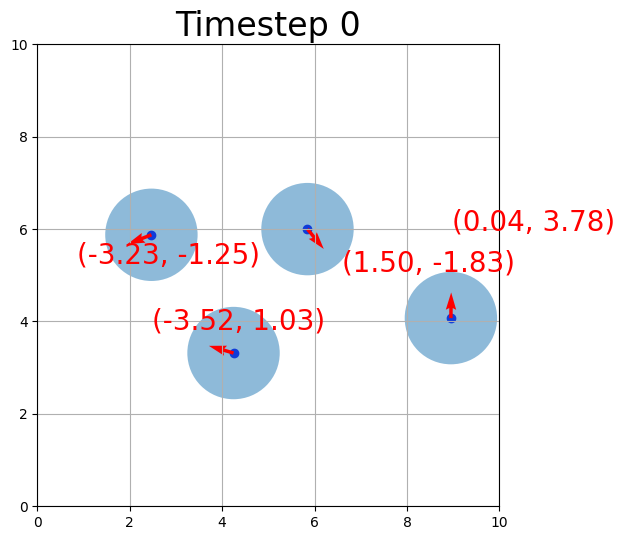

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import numpy as np

def plot_timestep(i):
    ax.clear()
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])
    ax.set_aspect('equal')
    ax.grid(True)

    positions = np.array(positions)
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=20)

    ax.set_title(f'Timestep {i}', fontsize=24)

num_timesteps = 100
fig, ax = plt.subplots(figsize=(10, 6))

ani = animation.FuncAnimation(fig, plot_timestep, frames=num_timesteps, interval=200)
# Save the animation as a GIF
ani.save('animation.gif', writer=PillowWriter(fps=10))

In [72]:

position_history = simulation.get_position_history()
position_history_by_timestep_list = list(map(list, zip(*position_history)))
#position_history_by_timestep_list = list(map(list, zip(*position_history)))
print(position_history_by_timestep_list)
print(len(position_history_by_timestep_list))


[[tensor([4.2465, 3.3168]), tensor([2.4690, 5.8763]), tensor([8.9514, 4.0727]), tensor([5.8472, 5.9993])], [tensor([3.8944, 3.4197]), tensor([2.1455, 5.7508]), tensor([8.9554, 4.4504]), tensor([5.9974, 5.8163])], [tensor([3.5424, 3.5225]), tensor([1.8221, 5.6254]), tensor([8.9594, 4.8281]), tensor([6.1476, 5.6332])], [tensor([3.1904, 3.6253]), tensor([1.4986, 5.4999]), tensor([8.9634, 5.2058]), tensor([6.2978, 5.4502])], [tensor([2.8383, 3.7281]), tensor([1.1752, 5.3745]), tensor([8.9674, 5.5835]), tensor([6.4480, 5.2671])], [tensor([2.4863, 3.8310]), tensor([0.8517, 5.2490]), tensor([8.9714, 5.9612]), tensor([6.5983, 5.0841])], [tensor([2.1343, 3.9338]), tensor([1.1752, 5.1236]), tensor([8.9754, 6.3389]), tensor([6.7485, 4.9011])], [tensor([2.1746, 3.5498]), tensor([1.1062, 5.4849]), tensor([8.9794, 6.7166]), tensor([6.8987, 4.7180])], [tensor([2.2002, 3.1842]), tensor([1.0521, 5.8279]), tensor([8.9835, 7.0943]), tensor([7.0489, 4.5350])], [tensor([2.2257, 2.8187]), tensor([0.9980, 6.

In [73]:

t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
result = torch.stack(t_tensor_list, dim=0)
print(result.shape)
print(result)

torch.Size([100, 8])
tensor([[4.2465, 3.3168, 2.4690, 5.8763, 8.9514, 4.0727, 5.8472, 5.9993],
        [3.8944, 3.4197, 2.1455, 5.7508, 8.9554, 4.4504, 5.9974, 5.8163],
        [3.5424, 3.5225, 1.8221, 5.6254, 8.9594, 4.8281, 6.1476, 5.6332],
        [3.1904, 3.6253, 1.4986, 5.4999, 8.9634, 5.2058, 6.2978, 5.4502],
        [2.8383, 3.7281, 1.1752, 5.3745, 8.9674, 5.5835, 6.4480, 5.2671],
        [2.4863, 3.8310, 0.8517, 5.2490, 8.9714, 5.9612, 6.5983, 5.0841],
        [2.1343, 3.9338, 1.1752, 5.1236, 8.9754, 6.3389, 6.7485, 4.9011],
        [2.1746, 3.5498, 1.1062, 5.4849, 8.9794, 6.7166, 6.8987, 4.7180],
        [2.2002, 3.1842, 1.0521, 5.8279, 8.9835, 7.0943, 7.0489, 4.5350],
        [2.2257, 2.8187, 0.9980, 6.1708, 8.9875, 7.4720, 7.1991, 4.3520],
        [2.2513, 2.4531, 1.0521, 6.5138, 8.9915, 7.8497, 7.3493, 4.1689],
        [2.2768, 2.0875, 1.1062, 6.8568, 8.9955, 8.2274, 7.4995, 3.9859],
        [2.3024, 1.7219, 1.1604, 7.1997, 8.9995, 8.6052, 7.6497, 3.8028],
        [2.3279, 

In [74]:
import torch
import torch

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)


labels = ["num_bodies", "masses", "radii", "acceleration_coefficients", "initial_v"]

def prior_fn_basic(n_samples: int = 1) -> torch.Tensor:
    constant_mass_value = 1.0
    constant_radius_value = max_radius
    acceleration_coefficient_value = 0.0
    velocity_distribution = torch.distributions.Uniform(low=-4, high=4)

    num_bodies = torch.tensor(2)
    masses = torch.full((num_bodies,), constant_mass_value)
    radii = torch.full((num_bodies,), constant_radius_value)
    a_coeffs = torch.full((num_bodies,), acceleration_coefficient_value)
    initial_v = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))


    flattened_tensors = torch.cat([torch.flatten(num_bodies),
                                   torch.flatten(masses),
                                   torch.flatten(radii),
                                   torch.flatten(a_coeffs),
                                   torch.flatten(initial_v)], dim=0)
    
    # concatenate flattened tensors n_samples times
    return torch.stack([flattened_tensors for _ in range(n_samples)], dim=0)


In [75]:

# prior and simulation interfaces
class Prior:
    def __init__(self, prior_fn, labels):
        self.prior_fn = prior_fn
        self.labels = labels
        self.mean = None
        self.std = None
        
    def sample(self, num_samples: int = 1) -> torch.Tensor:
        samples = self.prior_fn(num_samples)
        self.mean = torch.mean(samples)
        self.std = torch.std(samples)
        return samples
        
    def get_stats(self):
        if self.mean is None and self.std is None:
            raise ValueError("Sample first before getting stats")
        else:
            return self.mean, self.std
    
    def get_labels(self):
        return self.labels

In [76]:
basic_prior = Prior(prior_fn_basic, labels)
some_X = basic_prior.sample(1)
print(f"some_X: {some_X}")

some_X: tensor([[ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000, -0.2623,
          2.8816, -0.2753, -2.0490]])


In [77]:
import torch
import torch
# data set creation 
# X - input data - position histories by timestep 
# Y - ouput data - hidden varriables 


def simulate_collisions_simple(Y_i, VARIABLES, total_time, dt):

    position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)
    HIDDENVARIABLES = HiddenVariables.from_tensor(Y_i)

    initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(VARIABLES, position_distribution)
    VARIABLES.starting_positions = initial_positions

    simulation = ElasticCollisionSimulation(variables=VARIABLES, 
                                            enable_logging=False, 
                                            noise=False)

    _ = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                            total_time=total_time, \
                            dt=dt)
    
    position_history_by_timestep_list = list(map(list, zip(*position_history)))
    t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
    return torch.stack(t_tensor_list, dim=0)

    
# Generate a simulated training dataset using the SIR model and prior distribution
def generate_training_data(num_samples, VARIABLES, total_time,dt, prior):

    Y = prior.sample(num_samples)

    X = []
    for i in range(num_samples):
        # access entries in Y torch tensor along the -1th dimension
        Y_i = Y[i]

        # -------- create X values using the simulation function 
        X_i = simulate_collisions_simple(Y_i, VARIABLES, total_time, dt)
        X.append(X_i)

    # X is a list of tensors, convert to a single tensor
    X = torch.stack(X, dim=0)
    return X, Y



In [78]:
X_train, Y_train = generate_training_data(5, VARIABLES, total_time, dt, basic_prior)
print(f"X_train shape: {X_train.shape}")
print(f"X_train: {X_train}")

X_train shape: torch.Size([5, 100, 8])
X_train: tensor([[[4.2465, 3.3168, 2.4690,  ..., 4.0727, 5.8472, 5.9993],
         [3.8944, 3.4197, 2.1455,  ..., 4.4504, 5.9974, 5.8163],
         [3.5424, 3.5225, 1.8221,  ..., 4.8281, 6.1476, 5.6332],
         ...,
         [8.4671, 6.4638, 6.9142,  ..., 6.2252, 2.2871, 5.1347],
         [8.9124, 6.4036, 6.6190,  ..., 6.1550, 2.1023, 5.2533],
         [9.3577, 6.3435, 6.3238,  ..., 6.0848, 1.9175, 5.3720]],

        [[4.2465, 3.3168, 2.4690,  ..., 4.0727, 5.8472, 5.9993],
         [3.8944, 3.4197, 2.1455,  ..., 4.4504, 5.9974, 5.8163],
         [3.5424, 3.5225, 1.8221,  ..., 4.8281, 6.1476, 5.6332],
         ...,
         [8.4671, 6.4638, 6.9142,  ..., 6.2252, 2.2871, 5.1347],
         [8.9124, 6.4036, 6.6190,  ..., 6.1550, 2.1023, 5.2533],
         [9.3577, 6.3435, 6.3238,  ..., 6.0848, 1.9175, 5.3720]],

        [[4.2465, 3.3168, 2.4690,  ..., 4.0727, 5.8472, 5.9993],
         [3.8944, 3.4197, 2.1455,  ..., 4.4504, 5.9974, 5.8163],
         [

In [79]:
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_train: {Y_train}")

Y_train shape: torch.Size([5, 11])
Y_train: tensor([[ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.4172,
          2.2076, -2.1366,  0.5435],
        [ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000, -1.6212,
         -0.8327,  2.3429, -1.0473],
        [ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.2094,
          0.9462,  0.5050, -2.7009],
        [ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  2.1465,
         -1.5060,  0.2679, -1.7206],
        [ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.3514,
         -1.6546,  2.2300, -1.4400]])


#### Training simple feed-forward predictor model

In [80]:
from torch import nn

# Define the neural network architecture
# simple feed forward fully connected neural network with num_l_layers
class ParameterPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_l_layers: int = 1):
        super(ParameterPredictor, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1_s = self._build_fc_linear_layers(input_size, hidden_size, num_l_layers)
        self.relu = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_size, 11)  # Output layer with 11 neurons for the output values

    def _build_fc_linear_layers(self, input_size, hidden_size, num_layers):
        layers = []
        if num_layers == 0:
            raise ValueError("num_layers must be greater than 0")
        elif num_layers == 1:
            return [nn.Linear(input_size, hidden_size)]
        elif num_layers > 1:
            return [nn.Linear(input_size, hidden_size)] + [nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)]
        return layers

    def forward(self, x):
        x = self.flatten(x)
        for layer in self.fc1_s:
            temp_x = layer(x)
            x = self.relu(temp_x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [81]:
total_time = 10.0 
num_bodies = 2
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius


VARIABLES = Variables(
        masses = torch.full((num_bodies,), constant_mass_value),
        radii = torch.full((num_bodies,), constant_radius_value),
        starting_positions = None,
        initial_velocities= None,
        acceleration_coefficients = torch.full((num_bodies,), acceleration_coefficient_value),
        num_bodies = num_bodies,
        space_size = torch.tensor([space_size, space_size]),
    )

In [82]:
# Define the number of training and test samples
num_train_samples = 80  # Adjust as needed
num_test_samples = 20   # Adjust as needed


# Generate training data
prior = Prior(prior_fn_basic, labels)
X_train, Y_train = generate_training_data(num_train_samples, VARIABLES, total_time,dt, prior)
# Generate test data
X_test, Y_test = generate_training_data(num_test_samples, VARIABLES, total_time, dt, prior)


print("Y_train shape:", Y_train.shape)
print("X_train shape:", X_train.shape)


print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: torch.Size([80, 11])
X_train shape: torch.Size([80, 100, 8])
X_test shape: torch.Size([20, 100, 8])
Y_test shape: torch.Size([20, 11])


In [ ]:
def train_model(model, optimizer, criterion, num_samples, num_epochs, batch_size):
    
    for epoch in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            inputs = X_train[i:i+batch_size]
            labels = Y_train[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

In [ ]:
# Create instances of the feature extractor and Conditional RealNVP
blocks = 10
num_epochs = 30
hidden_size = 64
condition_size = hidden_size
f_input_size = 200
# Define the batch size
batch_size = 10


# Create the neural network
T = 100
input_size = T * 2  # Input shape is (T, 2) for X
hidden_size = 64
model = ParameterPredictor(input_size, hidden_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
# Training loop
num_epochs = 50
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, num_samples, batch_size):
        inputs = X_train[i:i+batch_size]
        labels = Y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)

print(f"Test loss: {test_loss.item()}")

In [ ]:
# Lists to store results
hidden_sizes = [32, 64,128]  # Vary hidden layer size
train_set_sizes = [500, 1000, 2000]  # Vary training set size
accuracies = []

# Training loop
for hidden_size in hidden_sizes:
    for train_set_size in train_set_sizes:
        model = ParameterPredictor(input_size, hidden_size)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        X_train, Y_train = generate_training_data(train_set_size, T, prior_distribution)

        num_epochs = 50
        batch_size = 32
        losses = []

        for epoch in range(num_epochs):
            for i in range(0, train_set_size, batch_size):
                inputs = X_train[i:i+batch_size]
                labels = Y_train[i:i+batch_size]

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            losses.append(loss.item())

        # Evaluate the model on a simulated test set (similar to training data generation)
        X_test, Y_test = generate_training_data(num_samples, T, prior_distribution)
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, Y_test)

        
        accuracies.append(test_loss.item())

# Create a heatmap of accuracies
accuracies = np.array(accuracies).reshape(len(hidden_sizes), len(train_set_sizes))
plt.figure(figsize=(10, 6))
plt.imshow(accuracies, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Test Loss')
plt.xticks(np.arange(len(train_set_sizes)), train_set_sizes)
plt.yticks(np.arange(len(hidden_sizes)), hidden_sizes)
plt.xlabel('Training Set Size')
plt.ylabel('Hidden Layer Size')
plt.title('Accuracy Heatmap')
plt.show()